# Virtual Internship Assignment 1

## Instructions
There are two documents attached; one contains the list of people who registered for a program while the other contains the list of those that eventually got enrolled.
1. Applying Data Analysis and Visualization, glean out insights from both datasets with respect to the Gender of the applicants.
2. What is the probability that a randomly selected registered female will be enrolled in the program?
3. What is the probability that a randomly selected registered male will be enrolled in the program?
4. What is the probability that a registered applicant will eventually enroll in the program?

### Submission deadline is: 12:00pm on Thursday, 25th February 2021
Submissions are made by initiating a pull request from the branch assigned to you in your forked version of the repository.
Cheers!


In [4]:
import pandas as pd 
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
enrolled = pd.read_csv("enrolled applicants.csv", index_col = "Unnamed: 0")
registered = pd.read_csv("registered applicants.csv", index_col = "Unnamed: 0")

### Data Wrangling
    Enrolled

In [6]:
enrolled.head()

,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
Unnamed: 0,,,,,,
1120,Robert,Mccain,WEBSITE,Full Stack,Weekday,Male
2557,Russel,Reagin,Mr Simps,Full Stack,Weekday,Male
1682,Barry,Dickson,WEBSITE,Full Stack,Weekday,Male
1961,Allen,Williams,Mr Simps,NaN,Weekday,Male
295,Brian,Bryon,Social Media,Python For Data Science,Weekend,Male


In [7]:
enrolled["GENDER"].value_counts()

Male      1611
Female     142
male        12
female       1
Name: GENDER, dtype: int64

In [8]:
enrolled["GENDER"]=enrolled["GENDER"].apply(lambda x: x.capitalize())
enrolled["GENDER"].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
enrolled.describe(include='O').T

,count,unique,top,freq
FIRST NAME,1766,550,James,63
LAST NAME,1766,1323,Brown,16
SOURCE,1754,3,Social Media,1096
COURSE,1741,13,Full Stack,310
TRACK,1766,3,Weekday,1131
GENDER,1766,2,Male,1623


In [10]:
enrolled["status"] = "Enrolled"

   ### Registered

In [11]:
registered.head()

,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
Unnamed: 0,,,,,,
2373,Brian,May,Social Media,Python For DataScience,Weekend,Male
758,Leon,Melvin,Social Media,Product Design(UI/UX),Weekend,Male
2287,Juan,Harris,Mr Simps,Product Design(UI/UX),Weekday,Male
2480,Gilbert,Denson,Social Media,Figma Design to Webflow,Weekend,Male
1359,Larry,Williams,WEBSITE,Python For DataScience,Weekday,Male


In [12]:
# Missing 
registered.isnull().mean().round(3)

FIRST NAME    0.000
LAST NAME     0.000
SOURCE        0.007
COURSE        0.007
TRACK         0.000
GENDER        0.015
dtype: float64

In [13]:
registered["GENDER"].unique()

array(['Male', 'Female', nan, 'male', 'female'], dtype=object)

In [14]:
registered["GENDER"] = registered["GENDER"].apply(lambda x: str(x).capitalize())
registered["GENDER"].unique()

array(['Male', 'Female', 'Nan'], dtype=object)

In [21]:
registered.describe(include='O').T

,count,unique,top,freq
FIRST NAME,3676,921,James,121
LAST NAME,3676,2453,Williams,33
SOURCE,3650,3,Social Media,2225
COURSE,3651,13,Full Stack,668
TRACK,3676,3,Weekday,2312
GENDER,3676,3,Male,2903


In [15]:
registered["status"] = "Not Enrolled"

### Merge

In [19]:
list(enrolled.index) in list(registered.index) #####Data Overlap

False

In [18]:
data = pd.concat([enrolled, registered])
data.describe(include='O')

,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER,status
count,5442,5442,5404,5392,5442,5442,5442
unique,921,2453,3,13,3,3,2
top,James,Williams,Social Media,Full Stack,Weekday,Male,Not Enrolled
freq,184,49,3321,978,3443,4526,3676


In [20]:
data["COURSE"].unique()

array(['Full Stack', nan, 'Python For Data Science', 'FullStack',
       'Product Design(UI/UX)', 'Product Management', 'Frontend',
       'Frontend Web Development', 'Figma Design to Webflow',
       'Product Design(UI/UX) ONLINE', 'Product Design',
       'Backend With Python Django', 'CyberSecurity',
       'Python For DataScience'], dtype=object)

In [21]:
# Merging and cleaning courses

data["COURSE"] = data["COURSE"].apply(lambda x:str(x).replace(' ',''))
data["COURSE"]= data["COURSE"].replace(["ProductDesign(UI/UX)","ProductDesign(UI/UX)ONLINE"], "Product Design")
data["COURSE"] =data["COURSE"].replace(["FrontendWebDevelopment"], "Frontend")
data["COURSE"] =data["COURSE"].replace(["Python For Data Science", "Python For DataScience"], "Pyhton for Data Science")
data["COURSE"] =data["COURSE"].replace(['nan'], data['COURSE'].mode()[0])

data['COURSE'].unique()

array(['FullStack', 'PythonForDataScience', 'Product Design',
       'ProductManagement', 'Frontend', 'FigmaDesigntoWebflow',
       'ProductDesign', 'BackendWithPythonDjango', 'CyberSecurity'],
      dtype=object)

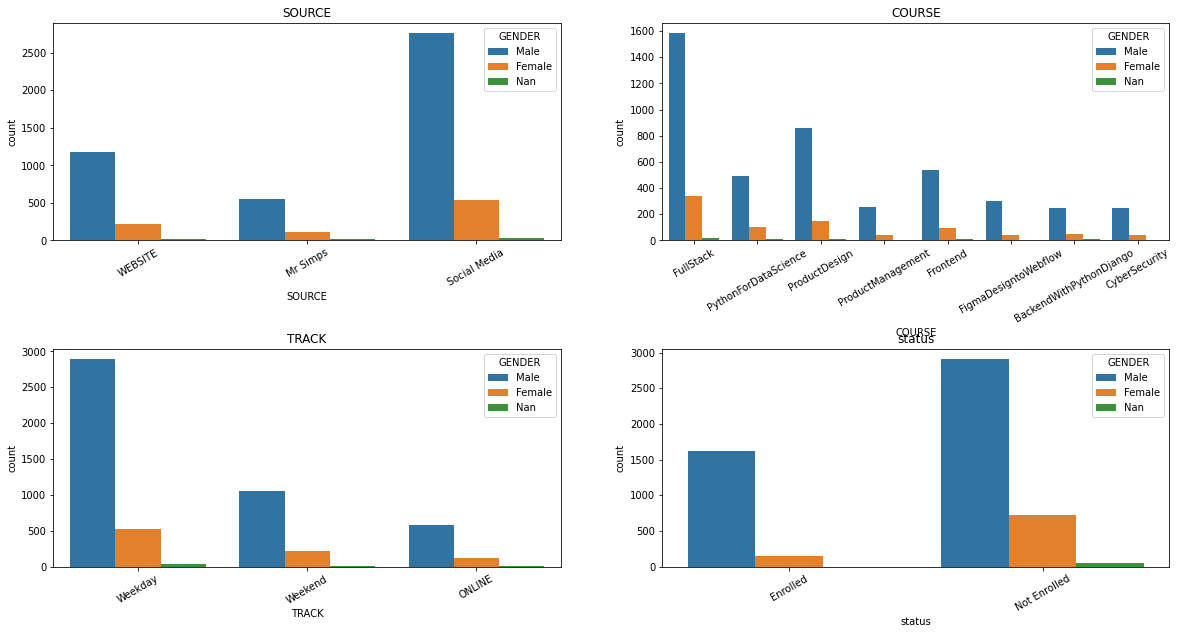

In [41]:
features = [x for x in data.columns if data[x].dtypes and data[x].nunique() < 10]
features.pop(-2)
features

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
fig.set_size_inches(20, 10)
fig.subplots_adjust(wspace=0.2)
fig.subplots_adjust(hspace=0.5)

for feature, ax in zip(features, axs.flatten()):
    sns.countplot(x=data[feature], ax=ax, hue="GENDER", data=data)
    ax.set_title(feature)
    ax.tick_params(axis='x', labelrotation=30)

plt.show()

#### 2. What is the probability that a randomly selected registered female will be enrolled in the program?
#### 3. What is the probability that a randomly selected registered male will be enrolled in the program?


In [22]:
data["gender_status"] = data["GENDER"] +"_"+ data["status"]

In [27]:
#### 3. What is the probability that a randomly selected registered female will be enrolled in the program?

num_female_enrolled = len(data[(data['GENDER']=='Female') & (data['status'] == 'Enrolled')])
total_number_female = len(data[(data['GENDER']=='Female')])

print('Probability of randomly selecting a Female who enrolled is {}'.format(round(num_female_enrolled/total_number_female,3)))

Probability of randomly selecting a Female who enrolled is 0.166


In [26]:
#### 3. What is the probability that a randomly selected registered male will be enrolled in the program?

num_male_enrolled = len(data[(data['GENDER']=='Male') & (data['status'] == 'Enrolled')])
total_number_male = len(data[(data['GENDER']=='Male')])

print('Probability of randomly selecting a Male who enrolled is {}'.format(round(num_male_enrolled/total_number_male,3)))

Probability of randomly selecting a Male who enrolled is 0.359


#### 4. What is the probability that a registered applicant will eventually enroll in the program?

In [28]:
num_enrolled = len(data[(data["status"]=="Enrolled")])
total_number_enrolled = len(data)


print('Probability of randomly selecting a person who enrolled is {}'.format(round(num_enrolled/total_number_enrolled,2)))

Probability of randomly selecting a person who enrolled is 0.32
